# A/B Test Challenge



---

#### What is an A/B Test? 

It is a decision making support & research methodology that allow you to measure an impact of a change in a product (e.g.: a digital product). For this challenge you will analyse the data resulting of an A/B test performed on a digital product where a new set of sponsored ads are included.


#### Measure of success

Metrics are need it to measure the success of your product. They are typically split in the following categories: 

- __Enganged based metrics:__ number of users, number of downloads, number of active users, user retention, etc.

- __Revenue and monetization metrics:__ ads and affiliate links, subscription-based, in-app purchases, etc.

- __Technical metrics:__ service level indicators (uptime of the app, downtime of the app, latency).



---

## Metrics understanding

In this part you must analyse the metrics involved in the test. We will focus in the following metrics:

- Activity level + Daily active users (DAU).

- Click-through rate (CTR)

### Activity level

In the following part you must perform every calculation you consider necessary in order to answer the following questions:

- How many activity levels you can find in the dataset (Activity level of zero means no activity).

- What is the amount of users for each activity level.

- How many activity levels do you have per day and how many records per each activity level.

At the end of this section you must provide your conclusions about the _activity level_ of the users.

__Dataset:__ `activity_pretest.csv`

In [66]:
# your-code
# imports
import numpy as np
import pandas as pd
from statsmodels.stats.weightstats import ztest
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt


In [67]:
#ACTIVITY
df_activity_level= pd.read_csv('./data/activity_pretest.csv')

In [68]:
df_activity_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860000 entries, 0 to 1859999
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   userid          object
 1   dt              object
 2   activity_level  int64 
dtypes: int64(1), object(2)
memory usage: 42.6+ MB


In [69]:
df_activity_level.head(3)

,userid,dt,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,0


In [70]:
#Niveles de actividad
#RESPUESTA: hay 19 niveles de actividad.

In [71]:
df_activity_level1= df_activity_level.loc[df_activity_level['activity_level']!=0,:]

In [72]:
df_activity_level1.head(4)

,userid,dt,activity_level
909125,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1
909126,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1
909127,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1
909128,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,1


In [73]:
df_activity_level1['activity_level'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [74]:
type(df_activity_level1)

pandas.core.frame.DataFrame

In [75]:
#Usuarios para cada nivel de actividad

In [76]:
user_level= df_activity_level1.groupby('activity_level')['userid'].count().reset_index()


In [77]:
user_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   activity_level  20 non-null     int64
 1   userid          20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [78]:
user_level.head(20)

,activity_level,userid
0,1,48732
1,2,49074
2,3,48659
3,4,48556
4,5,49227
5,6,48901
6,7,48339
7,8,48396
8,9,48820
9,10,48943


In [79]:
#niveles de actividad por día y registros por nivel de actividad.
df_activity_level1.head()

,userid,dt,activity_level
909125,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1
909126,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1
909127,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1
909128,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,1
909129,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1


In [80]:
#how many activity levels do you have per day and how many records per each activity level.
level_day= df_activity_level1.groupby(['dt','activity_level']).agg({'userid':'count'})
level_day

userid
dt         activity_level        
2021-10-01 1                 1602
           2                 1507
           3                 1587
           4                 1551
           5                 1586
...                           ...
2021-10-31 16                1499
           17                1534
           18                1531
           19                1616
           20                 783

[620 rows x 1 columns]

### Daily active users (DAU)

![ab_test](./img/user_activity_ab_testing.JPG)


The daily active users (DAU) refers to the amount of users that are active per day (activity level of zero means no activity). You must perform the calculation of this metric and provide your insights about it.

__Dataset:__ `activity_pretest.csv`

In [81]:
#DAU
#Con esto hago el recuento total de usuarios por día
dau = df_activity_level1.groupby('dt')['userid'].nunique().reset_index()
dau.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dt      31 non-null     object
 1   userid  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [82]:
dau.head(6)

,dt,userid
0,2021-10-01,30634
1,2021-10-02,30775
2,2021-10-03,30785
3,2021-10-04,30599
4,2021-10-05,30588
5,2021-10-06,30639


In [83]:
dau.tail(5)

,dt,userid
26,2021-10-27,30661
27,2021-10-28,30734
28,2021-10-29,30723
29,2021-10-30,30628
30,2021-10-31,30519


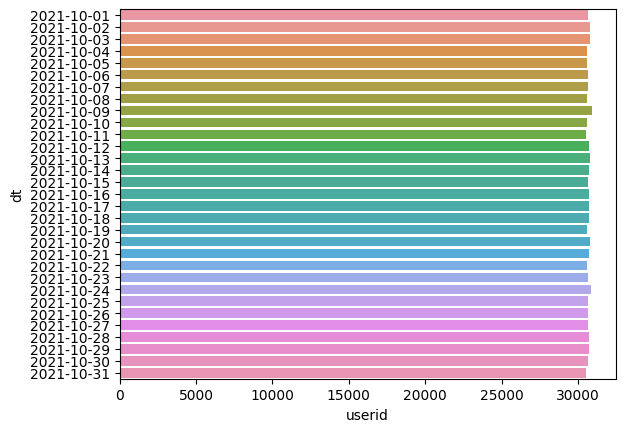

In [84]:
ax = sns.barplot(y="dt",
                 x= 'userid',
                 data=dau)

In [85]:
# Otra opción sería hacer esto, pero es lo que ya tengo arriba y creo que no es lo que se solicita.
dau2 = df_activity_level1.groupby('dt')['userid'].value_counts().reset_index(name='count')
dau2


,dt,userid,count
0,2021-10-01,00037d4d-ebfa-4a99-9d3e-adbefd6dae3a,1
1,2021-10-01,0004c8bb-df77-43b2-a93c-7398e9bc5175,1
2,2021-10-01,000a9421-3a7c-4910-bb77-508f415faaf1,1
3,2021-10-01,000c70d2-75cd-4814-ba43-a30736b395fa,1
4,2021-10-01,001291fe-996d-47b5-a7ee-c73f4b77814b,1
...,...,...,...
950870,2021-10-31,ffee543d-1e45-489c-b75f-fac28882cdf3,1
950871,2021-10-31,ffeeb5d7-bafb-4aa5-909f-0f7fb96de8e4,1
950872,2021-10-31,fff370e6-ceed-4282-865f-7bb0863f7ec9,1
950873,2021-10-31,fffdf2f8-7f61-4fb3-b5fc-6323a72290a7,1


### Click-through rate (CTR)

![ab_test](./img/ad_click_through_rate_ab_testing.JPG)

Click-through rate (CTR) refers to the percentage of clicks that the user perform from the total amount ads showed to that user during a certain day. You must perform the analysis of this metric (e.g.: average CTR per day) and provide your insights about it.

__Dataset:__ `ctr_pretest.csv`

In [86]:
# your-code
df_pretest= pd.read_csv('./data/ctr_pretest.csv')
df_pretest.head(5)



,userid,dt,ctr
0,4b328144-df4b-47b1-a804-09834942dce0,2021-10-01,34.28
1,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,34.67
2,8028cccf-19c3-4c0e-b5b2-e707e15d2d83,2021-10-01,34.77
3,652b3c9c-5e29-4bf0-9373-924687b1567e,2021-10-01,35.42
4,45b57434-4666-4b57-9798-35489dc1092a,2021-10-01,35.04


In [87]:
df_ctr = df_pretest.groupby('dt')['ctr'].mean().reset_index(name='ctr average per day').sort_values(by='dt')
df_ctr.head(4)

,dt,ctr average per day
0,2021-10-01,32.993446
1,2021-10-02,32.991664
2,2021-10-03,32.995086
3,2021-10-04,32.992995


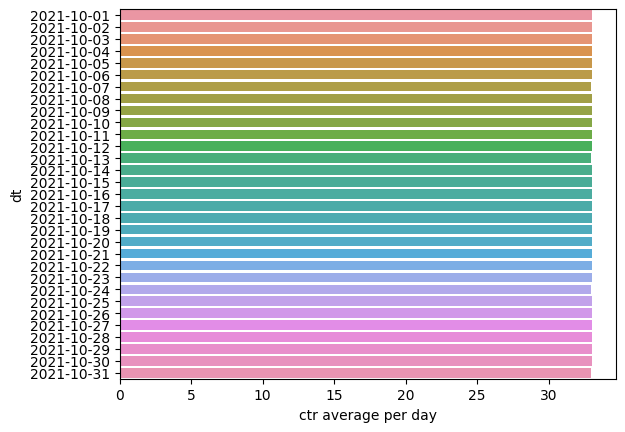

In [88]:
df_ctr['ctr average per day'] = pd.to_numeric(df_ctr['ctr average per day'])
ax = sns.barplot(x='ctr average per day',
                 y= 'dt',
                 data=df_ctr)

---

## Pretest metrics 

In this section you will perform the analysis of the metrics using the dataset that includes the result for the test and control groups, but only for the pretest data (i.e.: prior to November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups prior to the start of the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [89]:
#dau: cantidad de usuarios activos por día


In [90]:
#DAU
df_activity_all= pd.read_csv('./data/activity_all.csv')

In [91]:
#df_activity_all.info()

In [92]:
df_activity_all['groupid'].unique()


array([0, 1])

In [93]:
df_activity_all.tail(4)

,userid,dt,groupid,activity_level
3659996,6ffe1efe-2e5d-427f-95ff-cc862c46c798,2021-11-30,1,20
3659997,f2073207-25dd-4127-a893-b70106d5ead7,2021-11-30,0,20
3659998,0416f2be-3ab8-481b-873c-3678b4705ecf,2021-11-30,1,20
3659999,fa0d9e1b-8e7e-492b-9799-5b24de8d04cc,2021-11-30,0,20


In [94]:
#SUPRIMO LOS ACTIVITY LEVELS==0 & SOLO OCTUBRE
df_activity_all= df_activity_all.loc[(df_activity_all['activity_level']!=0)&(df_activity_all['dt']<"2021-11-01"),:]


In [95]:
#df_activity_all.info()

In [96]:
#LO CONVIERTO A FORMATO FECHA
df_activity_all['dt'] = pd.to_datetime(df_activity_all['dt'], format='%Y-%m-%d')


In [97]:
#df_activity_all.info()

In [98]:
#print(df_activity_all['dt'].unique())

In [99]:
df_activity_all['groupid'].value_counts()

1    475928
0    474947
Name: groupid, dtype: int64

In [100]:
df_activity_all['groupid'].unique()

array([1, 0])

In [101]:
control_group = df_activity_all[df_activity_all['groupid']==0]

In [102]:
control_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474947 entries, 1356595 to 3625442
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   userid          474947 non-null  object        
 1   dt              474947 non-null  datetime64[ns]
 2   groupid         474947 non-null  int64         
 3   activity_level  474947 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 18.1+ MB


In [103]:
control_group.head(4)

,userid,dt,groupid,activity_level
1356595,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,0,1
1356597,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,0,1
1356598,420a60e9-6394-4324-b02c-ab372609968e,2021-10-01,0,1
1356599,6f6b36ef-bd93-4399-a2f4-996c96d3e0a7,2021-10-01,0,1


In [104]:
#usuarios por días y nivel de actividad
control_group_d_l= control_group.groupby(['dt','activity_level']).agg({'userid':'count'})
control_group_d_l

userid
dt         activity_level        
2021-10-01 1                  792
           2                  755
           3                  799
           4                  800
           5                  798
...                           ...
2021-10-31 16                 739
           17                 724
           18                 756
           19                 803
           20                 369

[620 rows x 1 columns]

In [105]:
control_group_d_l.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 620 entries, (Timestamp('2021-10-01 00:00:00'), 1) to (Timestamp('2021-10-31 00:00:00'), 20)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   userid  620 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB


In [106]:
#usuarios por nivel de actividad grupo control
#sumo porque al aplicar el groupby anterior devuelve un integer
control_group_ul= control_group_d_l.groupby('activity_level')['userid'].sum().reset_index()
control_group_ul

,activity_level,userid
0,1,24390
1,2,24376
2,3,24241
3,4,24307
4,5,24552
5,6,24552
6,7,24296
7,8,24322
8,9,24428
9,10,24317


In [107]:
#DAU: cantidad de usuarios activos por día
dau_control_group= control_group.groupby('dt')['userid'].nunique().reset_index()
dau_control_group

,dt,userid
0,2021-10-01,15337
1,2021-10-02,15354
2,2021-10-03,15423
3,2021-10-04,15211
4,2021-10-05,15126
5,2021-10-06,15335
6,2021-10-07,15346
7,2021-10-08,15357
8,2021-10-09,15371
9,2021-10-10,15277


In [108]:
test_group = df_activity_all[df_activity_all['groupid']==1]

In [109]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475928 entries, 1356592 to 3625443
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   userid          475928 non-null  object        
 1   dt              475928 non-null  datetime64[ns]
 2   groupid         475928 non-null  int64         
 3   activity_level  475928 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 18.2+ MB


In [110]:
test_group_d_l= test_group.groupby(['dt','activity_level']).agg({'userid':'count'})
test_group_d_l

userid
dt         activity_level        
2021-10-01 1                  810
           2                  752
           3                  788
           4                  751
           5                  788
...                           ...
2021-10-31 16                 760
           17                 810
           18                 775
           19                 813
           20                 414

[620 rows x 1 columns]

In [111]:
#usuarios por nivel de actividad grupo prueba
test_group_ul= test_group_d_l.groupby('activity_level')['userid'].sum().reset_index()
test_group_ul

,activity_level,userid
0,1,24342
1,2,24698
2,3,24418
3,4,24249
4,5,24675
5,6,24349
6,7,24043
7,8,24074
8,9,24392
9,10,24626


In [112]:
#DAU
dau_test_group= test_group.groupby('dt')['userid'].nunique().reset_index()
dau_test_group

,dt,userid
0,2021-10-01,15297
1,2021-10-02,15421
2,2021-10-03,15362
3,2021-10-04,15388
4,2021-10-05,15462
5,2021-10-06,15304
6,2021-10-07,15291
7,2021-10-08,15243
8,2021-10-09,15531
9,2021-10-10,15304


In [113]:
#CTR
df_ctr_all= pd.read_csv('./data/ctr_all.csv')

In [114]:
df_ctr_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303408 entries, 0 to 2303407
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userid   object 
 1   dt       object 
 2   groupid  int64  
 3   ctr      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 70.3+ MB


In [115]:
df_ctr_all['groupid'].value_counts()

1    1355001
0     948407
Name: groupid, dtype: int64

In [116]:
ctr_control_group = df_ctr_all[df_ctr_all['groupid']==0]

In [117]:
ctr_cg= ctr_control_group.groupby('dt')['ctr'].mean().reset_index(name='ctr average per day').sort_values(by='dt')
ctr_cg

,dt,ctr average per day
0,2021-10-01,32.980627
1,2021-10-02,33.004056
2,2021-10-03,33.002006
3,2021-10-04,32.990363
4,2021-10-05,33.014167
...,...,...
56,2021-11-26,32.983067
57,2021-11-27,32.998942
58,2021-11-28,32.994947
59,2021-11-29,33.001101


In [118]:
ctr_test_group = df_ctr_all[df_ctr_all['groupid']==1]


In [119]:
ctr_tg= ctr_test_group.groupby('dt')['ctr'].mean().reset_index(name='ctr average per day').sort_values(by='dt')

In [120]:
ctr_tg

,dt,ctr average per day
0,2021-10-01,33.006299
1,2021-10-02,32.979326
2,2021-10-03,32.988139
3,2021-10-04,32.995596
4,2021-10-05,32.994796
...,...,...
56,2021-11-26,37.997834
57,2021-11-27,37.978912
58,2021-11-28,37.992709
59,2021-11-29,37.987909


In [121]:
#ZTEST
#H0:CTR del grupo de control es igual al CTR del grupo de prueba
#H1:CTR del grupo prueba es mayor al CTR del grupo de control

In [122]:
control_mean = ctr_cg['ctr average per day'].mean()
control_mean

32.9989767818454

In [123]:
hypothesis_mean= control_mean
sample_mean = ctr_tg['ctr average per day'].mean()
alpha = 0.05
print(f'hypothesis mean: {hypothesis_mean} USD',
      f'\nSample mean: {sample_mean} USD',
      f'\nProbability threshold: {alpha}')

hypothesis mean: 32.9989767818454 USD 
Sample mean: 35.45730635725661 USD 
Probability threshold: 0.05


In [164]:
#ZTEST OCTUBRE
Z_score, p_value = ztest(ctr_tg['ctr average per day'], value=hypothesis_mean)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: 7.621788882625345 
p-value: 2.501839858704133e-14


In [125]:
# Conclusión:
#Con este resultado no podemos rechazar la H0. 
#Por lo que concluimos que el en el grupo de prueba, el CTR no ha tenido por qué ser mayor y por tanto,
#no ha habido más click tras el cambio implementado.

In [126]:
#TTEST
#No se puede hacer con la media, si no que hay que pasarle la columna directamente
#Los resultados y conclusiones son los mismos que con el Z-TEST
hypothesis_mean= np.array(ctr_cg['ctr average per day'])
sample_mean = np.array(ctr_tg['ctr average per day'])
stats.ttest_ind(a=hypothesis_mean, b=sample_mean, equal_var=False)

Ttest_indResult(statistic=-7.621681539119162, pvalue=2.1684247330576884e-10)

---

## Experiment metrics 

In this section you must perform the same analysis as in the previous section, but using the data generated during the experiment (i.e.: after November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups during the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [127]:
df_activity_all_nov= pd.read_csv('./data/activity_all.csv')

In [128]:
df_activity_all_nov

,userid,dt,groupid,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,1,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,1,0
...,...,...,...,...
3659995,f0126b50-ad74-4480-9250-41b50a408932,2021-11-30,0,20
3659996,6ffe1efe-2e5d-427f-95ff-cc862c46c798,2021-11-30,1,20
3659997,f2073207-25dd-4127-a893-b70106d5ead7,2021-11-30,0,20
3659998,0416f2be-3ab8-481b-873c-3678b4705ecf,2021-11-30,1,20


In [130]:
# FILTRO DE NUEVO POR FECHA Y NIVELES
df_activity_all_nov= df_activity_all_nov.loc[(df_activity_all_nov['activity_level']!=0)&(df_activity_all_nov['dt']>="2021-11-01"),:]
df_activity_all_nov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1352533 entries, 1405324 to 3659999
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   userid          1352533 non-null  object
 1   dt              1352533 non-null  object
 2   groupid         1352533 non-null  int64 
 3   activity_level  1352533 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [133]:
#grupo de control noviembre
control_group_nov = df_activity_all_nov[df_activity_all_nov['groupid']==0]
control_group_nov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473460 entries, 1405325 to 3659999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userid          473460 non-null  object
 1   dt              473460 non-null  object
 2   groupid         473460 non-null  int64 
 3   activity_level  473460 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 18.1+ MB


In [134]:
#grupo de prueba noviembre
test_group_nov = df_activity_all_nov[df_activity_all_nov['groupid']==1]
test_group_nov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879073 entries, 1405324 to 3659998
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userid          879073 non-null  object
 1   dt              879073 non-null  object
 2   groupid         879073 non-null  int64 
 3   activity_level  879073 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 33.5+ MB


In [139]:
#usuarios por días y nivel de actividad grupo control
control_group_nov_da= control_group_nov.groupby(['dt','activity_level']).agg({'userid':'count'})
control_group_nov_da

userid
dt         activity_level        
2021-11-01 1                  819
           2                  861
           3                  838
           4                  847
           5                  845
...                           ...
2021-11-30 16                 822
           17                 788
           18                 771
           19                 769
           20                 378

[600 rows x 1 columns]

In [142]:
#usuarios por días y nivel de actividad grupo prueba
test_group_nov_da= test_group_nov.groupby(['dt','activity_level']).agg({'userid':'count'})
test_group_nov_da

userid
dt         activity_level        
2021-11-01 1                 1478
           2                 1549
           3                 1519
           4                 1513
           5                 1474
...                           ...
2021-11-30 16                1489
           17                1494
           18                1466
           19                1494
           20                 750

[600 rows x 1 columns]

In [140]:
#usuarios por nivel de actividad grupo control
control_group_nov_ua= control_group_nov_da.groupby('activity_level')['userid'].sum().reset_index()

In [141]:
control_group_nov_ua

,activity_level,userid
0,1,24734
1,2,24472
2,3,24247
3,4,24188
4,5,24150
5,6,24191
6,7,24276
7,8,24037
8,9,24283
9,10,24039


In [143]:
#usuarios por nivel de actividad grupo prueba
test_group_nov_ua= test_group_nov_da.groupby('activity_level')['userid'].sum().reset_index()
test_group_nov_ua

,activity_level,userid
0,1,45183
1,2,45507
2,3,45181
3,4,45148
4,5,44807
5,6,45007
6,7,44744
7,8,45180
8,9,45369
9,10,44687


In [144]:
#DAU grupo control: cantidad de usuarios activos por día 
dau_control_group_nov= control_group_nov.groupby('dt')['userid'].nunique().reset_index()
dau_control_group_nov

,dt,userid
0,2021-11-01,15989
1,2021-11-02,16024
2,2021-11-03,16049
3,2021-11-04,16040
4,2021-11-05,16045
5,2021-11-06,15991
6,2021-11-07,16133
7,2021-11-08,16119
8,2021-11-09,15953
9,2021-11-10,15990


In [145]:
#DAU grupo prueba: cantidad de usuarios activos por día 
dau_test_group_nov= test_group_nov.groupby('dt')['userid'].nunique().reset_index()
dau_test_group_nov

,dt,userid
0,2021-11-01,29318
1,2021-11-02,29289
2,2021-11-03,29306
3,2021-11-04,29267
4,2021-11-05,29336
5,2021-11-06,29306
6,2021-11-07,29255
7,2021-11-08,29263
8,2021-11-09,29286
9,2021-11-10,29340


In [146]:
#LECTURA FICHERO CTR
df_ctr_all_nov= pd.read_csv('./data/ctr_all.csv')

In [147]:
df_ctr_all_nov

,userid,dt,groupid,ctr
0,60389fa7-2d71-4cdf-831c-c2bb277ffa1e,2021-11-13,0,31.81
1,b59cb225-d160-4851-92d2-7cc8120a2f63,2021-11-13,0,30.46
2,aa336050-934e-453f-a5b0-dd881fcd114e,2021-11-13,0,34.25
3,8df767f4-a10f-4322-a722-676b7e02b372,2021-11-13,0,34.92
4,a74762ed-4da0-42ab-91d2-40d7e808dfe9,2021-11-13,0,34.95
...,...,...,...,...
2303403,932e0348-ea2d-4b98-8782-aa84420f0796,2021-11-12,1,37.27
2303404,6775a825-6d3d-4dc3-9335-cad061736752,2021-11-12,1,39.14
2303405,a7b55365-21f1-4123-b2b5-485a8c7b98da,2021-11-12,1,40.05
2303406,a6fa937c-6f40-4f04-b15b-f1de09e179db,2021-11-12,1,38.14


In [148]:
ctr_control_group_nov = df_ctr_all_nov[df_ctr_all_nov['groupid']==0]

In [150]:
ctr_control_group_nov.head(3)

,userid,dt,groupid,ctr
0,60389fa7-2d71-4cdf-831c-c2bb277ffa1e,2021-11-13,0,31.81
1,b59cb225-d160-4851-92d2-7cc8120a2f63,2021-11-13,0,30.46
2,aa336050-934e-453f-a5b0-dd881fcd114e,2021-11-13,0,34.25


In [152]:
#CTR PER DAY CONTROL GROUP
ctr_cg_nov= ctr_control_group_nov.groupby('dt')['ctr'].mean().reset_index(name='ctr average per day').sort_values(by='dt')
ctr_cg_nov

,dt,ctr average per day
0,2021-10-01,32.980627
1,2021-10-02,33.004056
2,2021-10-03,33.002006
3,2021-10-04,32.990363
4,2021-10-05,33.014167
...,...,...
56,2021-11-26,32.983067
57,2021-11-27,32.998942
58,2021-11-28,32.994947
59,2021-11-29,33.001101


In [149]:
ctr_test_group_nov = df_ctr_all_nov[df_ctr_all_nov['groupid']==1]

In [151]:
ctr_test_group_nov.head(3)

,userid,dt,groupid,ctr
15973,cd5df711-42f7-4684-9ae8-f6a72383bb28,2021-11-13,1,40.39
15974,fe630199-265b-4542-a103-a74d66abeb22,2021-11-13,1,37.70
15975,4b519a79-b1a4-40b0-9369-be9e2a2699af,2021-11-13,1,35.47


In [153]:
#CTR PER DAY TEST GROUP
ctr_tg_nov= ctr_test_group_nov.groupby('dt')['ctr'].mean().reset_index(name='ctr average per day').sort_values(by='dt')
ctr_tg_nov

,dt,ctr average per day
0,2021-10-01,33.006299
1,2021-10-02,32.979326
2,2021-10-03,32.988139
3,2021-10-04,32.995596
4,2021-10-05,32.994796
...,...,...
56,2021-11-26,37.997834
57,2021-11-27,37.978912
58,2021-11-28,37.992709
59,2021-11-29,37.987909


In [160]:
#ZTEST NOV
#H0:CTR del grupo de control es igual al CTR del grupo de prueba
#H1:CTR del grupo prueba es mayor al CTR del grupo de control

In [161]:
hypothesis_mean_nov= ctr_cg_nov['ctr average per day'].mean()
sample_mean_nov = ctr_tg_nov['ctr average per day'].mean()
alpha = 0.05
print(f'hypothesis mean: {hypothesis_mean}',
      f'\nSample mean: {sample_mean}',
      f'\nProbability threshold: {alpha}')

hypothesis mean: 32.9989767818454 
Sample mean: 35.45730635725661 
Probability threshold: 0.05


In [165]:
#ZTEST NOV
Z_score, p_value = ztest(ctr_tg_nov['ctr average per day'], value=hypothesis_mean)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: 7.621788882625345 
p-value: 2.501839858704133e-14


In [166]:
#ZTEST OCTUBRE
Z_score, p_value = ztest(ctr_tg['ctr average per day'], value=hypothesis_mean)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: 7.621788882625345 
p-value: 2.501839858704133e-14


In [163]:
#TTEST NOV
hypothesis_mean_novt= np.array(ctr_cg['ctr average per day'])
sample_mean_novt = np.array(ctr_tg['ctr average per day'])
stats.ttest_ind(a=hypothesis_mean_novt, b=sample_mean_novt, equal_var=False)

Ttest_indResult(statistic=-7.621681539119162, pvalue=2.1684247330576884e-10)

---

## Conclusions

Please provide your conclusions after the analyses and your recommendation whether we may or may not implement the changes in the digital product.

In [167]:
# Hipótesis
#H0:CTR del grupo de control es igual al CTR del grupo de prueba
#H1:CTR del grupo prueba es mayor al CTR del grupo de control

In [168]:
#ZTEST OCTUBRE
Z_score, p_value = ztest(ctr_tg['ctr average per day'], value=hypothesis_mean)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: 7.621788882625345 
p-value: 2.501839858704133e-14


In [169]:
#ZTEST NOV
Z_score, p_value = ztest(ctr_tg_nov['ctr average per day'], value=hypothesis_mean)
print(f'Z_score: {Z_score}', f'\np-value: {p_value}')

Z_score: 7.621788882625345 
p-value: 2.501839858704133e-14


In [170]:
#TTEST OCTUBRE
hypothesis_mean= np.array(ctr_cg['ctr average per day'])
sample_mean = np.array(ctr_tg['ctr average per day'])
stats.ttest_ind(a=hypothesis_mean, b=sample_mean, equal_var=False)

Ttest_indResult(statistic=-7.621681539119162, pvalue=2.1684247330576884e-10)

In [171]:
#TTEST NOV
hypothesis_mean_novt= np.array(ctr_cg['ctr average per day'])
sample_mean_novt = np.array(ctr_tg['ctr average per day'])
stats.ttest_ind(a=hypothesis_mean_novt, b=sample_mean_novt, equal_var=False)

Ttest_indResult(statistic=-7.621681539119162, pvalue=2.1684247330576884e-10)

---

#Conclusión
Mi conclusión es que los resultados son exactamente los mismos independientemente de si se hace el ZTEST o el TTEST así como si tenemos en cuenta los meses de octubre o noviembre.
No sé si está relacionado con el teorema del límite central que se vió en clase, o estoy mezclando cosas. 